# 9-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

자.. 드디어 오늘의 마지막 프로젝트입니다! 오늘 노드의 제목이기도 한 프로젝트네요 ㅎㅎ  

마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다. 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!  

데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.  

자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.  

이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

단계는 다음과 같이 정리가 되어 있습니다. 그러면 오늘의 마지막 프로젝트, 시작해 볼까요!!! 💪🏼

### (1) 데이터 가져오기
---
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.
    https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

In [2]:
train = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- to_datetime 활용 : 링크 참조 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime
- pandas datetime extract year month day 키워드로 검색해 보기

In [3]:
# datetime 컬럼을 datetime 자료형으로 변환하기
train['datetime'] = pd.to_datetime(train['datetime'])

# datetime 컬럼에서 연, 월, 일, 시, 분, 초 추출하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [5]:
import seaborn as sns

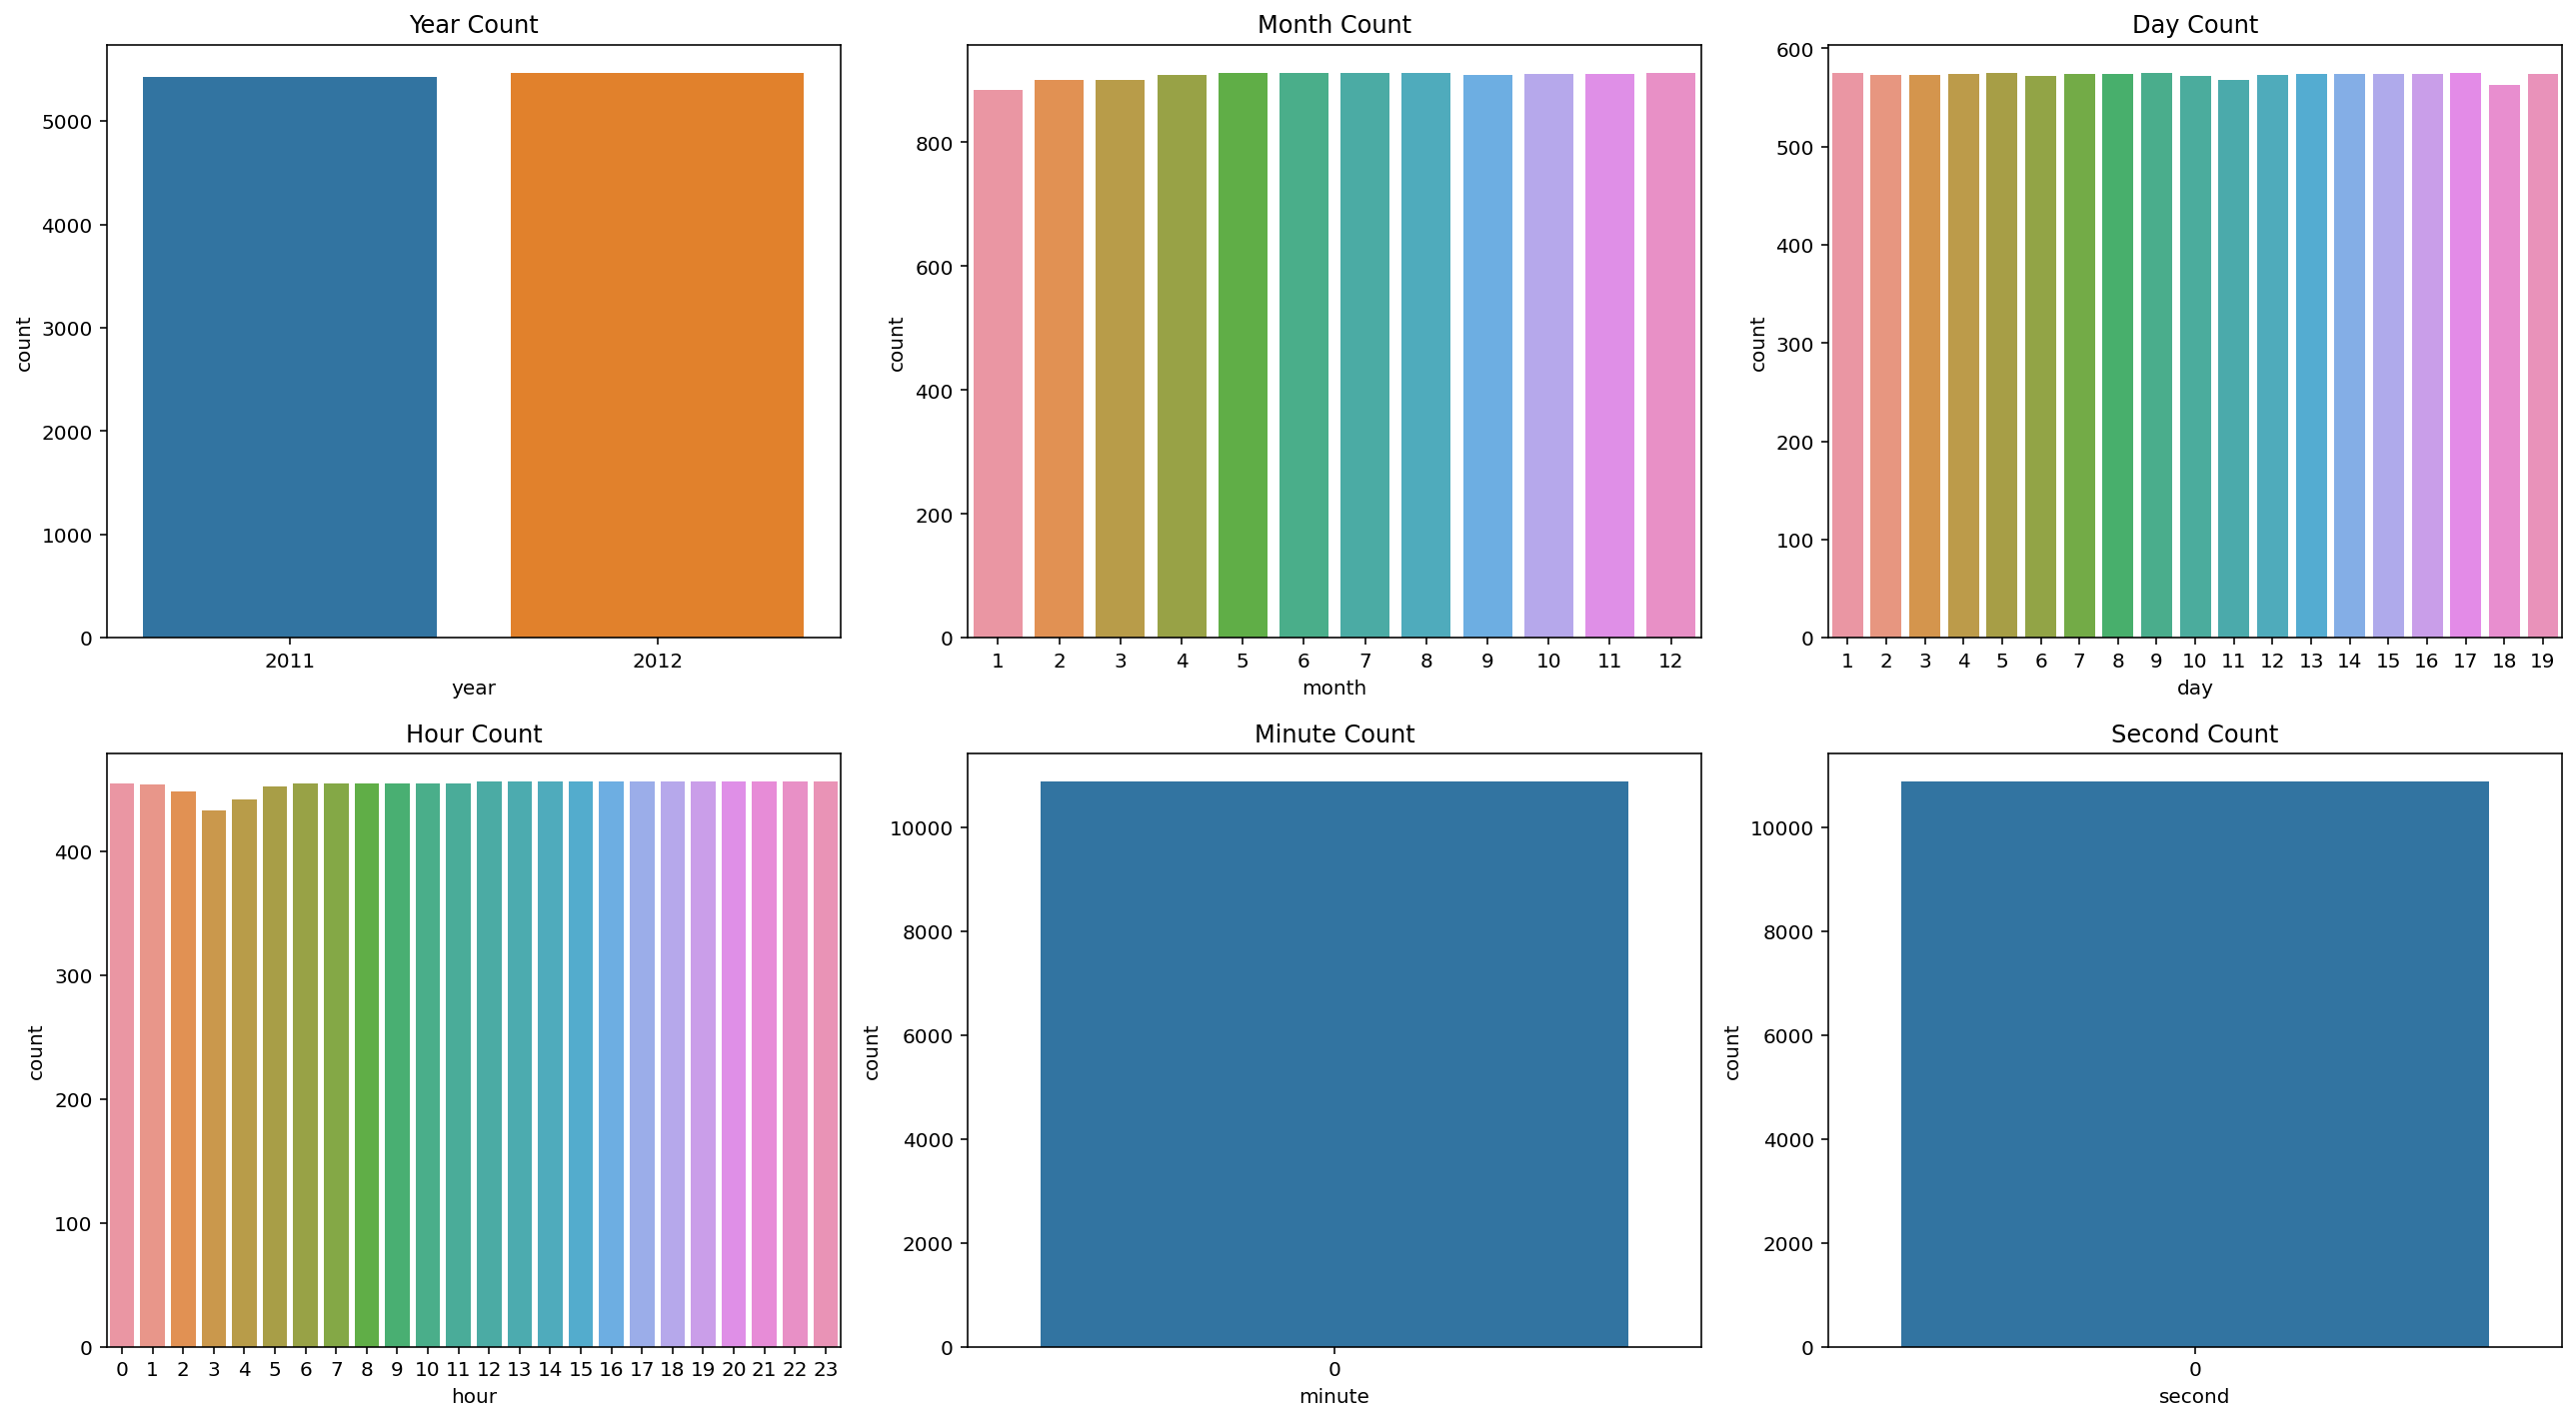

In [6]:
# 플롯의 크기 설정
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 

# year 데이터 개수 시각화
sns.countplot(ax=axes[0, 0], x='year', data=train)
axes[0, 0].set_title('Year Count')

# month 데이터 개수 시각화
sns.countplot(ax=axes[0, 1], x='month', data=train)
axes[0, 1].set_title('Month Count')

# day 데이터 개수 시각화
sns.countplot(ax=axes[0, 2], x='day', data=train)
axes[0, 2].set_title('Day Count')

# hour 데이터 개수 시각화
sns.countplot(ax=axes[1, 0], x='hour', data=train)
axes[1, 0].set_title('Hour Count')

# minute 데이터 개수 시각화
sns.countplot(ax=axes[1, 1], x='minute', data=train)
axes[1, 1].set_title('Minute Count')

# second 데이터 개수 시각화
sns.countplot(ax=axes[1, 2], x='second', data=train)
axes[1, 2].set_title('Second Count')

plt.tight_layout()
plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

데이터 필드
- datetime - 매시간 날짜 + 타임스탬프
- season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday - 해당 요일이 휴일인지 여부
- workingday - 해당 요일이 주말도 휴일도 아닌지 여부
- weather
    - 1: 맑음, 구름 약간, 구름 약간, 구름 약간
    - 2: 안개 + 구름, 안개 + 깨진 구름, 안개 + 구름 약간, 안개
    - 3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
    - 4: 폭우 + 얼음판 + 뇌우 + 안개, 눈 + 안개
- temp - 섭씨 온도
- atemp - "체감 온도" 섭씨
- humid - 상대 습도
- windspeed - 풍속
- casual - 비등록 사용자 대여가 시작된 건수
- registered - 등록된 사용자 대여 시작 횟수
- count - 총 대여 수

### windspeed 에 0 값 확인 후 대체

In [9]:
(train['windspeed'] == 0).sum()

1313

In [10]:
from sklearn.ensemble import RandomForestRegressor

# 풍속(windspeed) 결측값 처리 (랜덤 포레스트 모델로 예측하거나 평균값으로 대체)
def fill_windspeed(df):
    # 풍속이 0인 데이터를 예측 모델로 채움
    wdf = df[df['windspeed'] != 0]  # 풍속이 0이 아닌 경우만 학습 데이터로 사용
    zdf = df[df['windspeed'] == 0]  # 풍속이 0인 데이터를 예측해야 함

    rf_wind = RandomForestRegressor(n_estimators=100, random_state=42)
    features = ['season', 'year', 'month', 'hour', 'weather', 'temp', 'atemp', 'humidity']
    rf_wind.fit(wdf[features], wdf['windspeed'])
    predicted_windspeeds = rf_wind.predict(zdf[features])
    df.loc[df['windspeed'] == 0, 'windspeed'] = predicted_windspeeds
    return df

train = fill_windspeed(train)

In [11]:
(train['windspeed'] == 0).sum()

0

In [12]:
# season 확인
train['season'].unique()

array([1, 2, 3, 4])

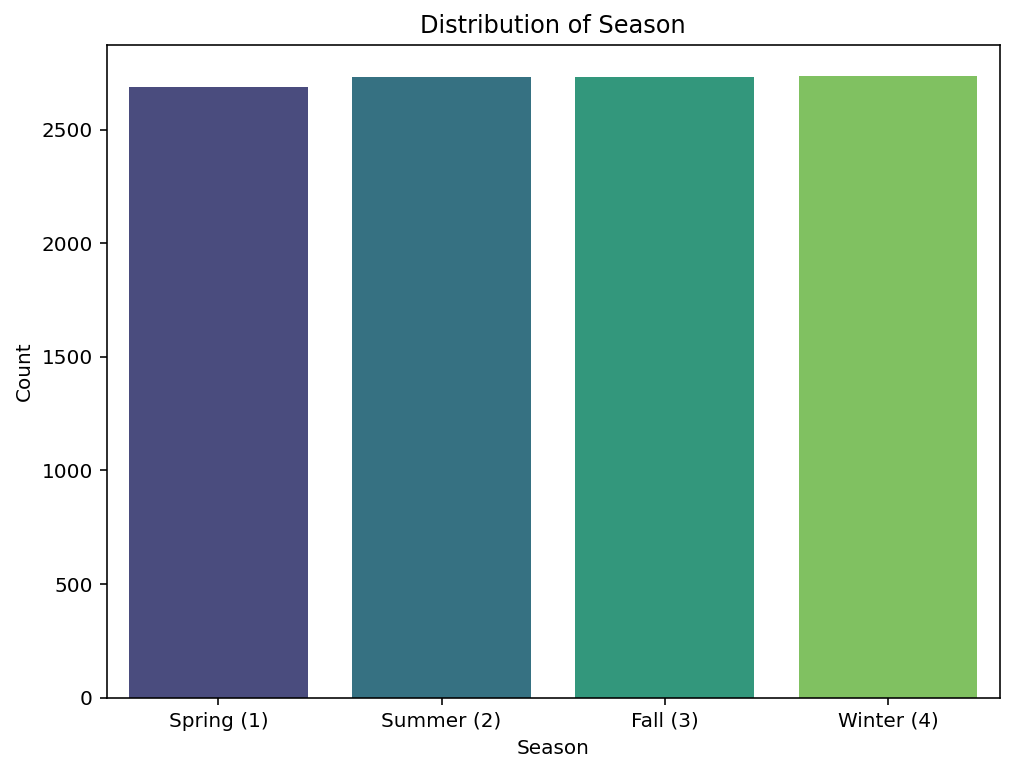

In [13]:
# season 변수의 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=train, palette='viridis')
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring (1)', 'Summer (2)', 'Fall (3)', 'Winter (4)'])
plt.show()

In [14]:
train['weather'].unique()

array([1, 2, 3, 4])

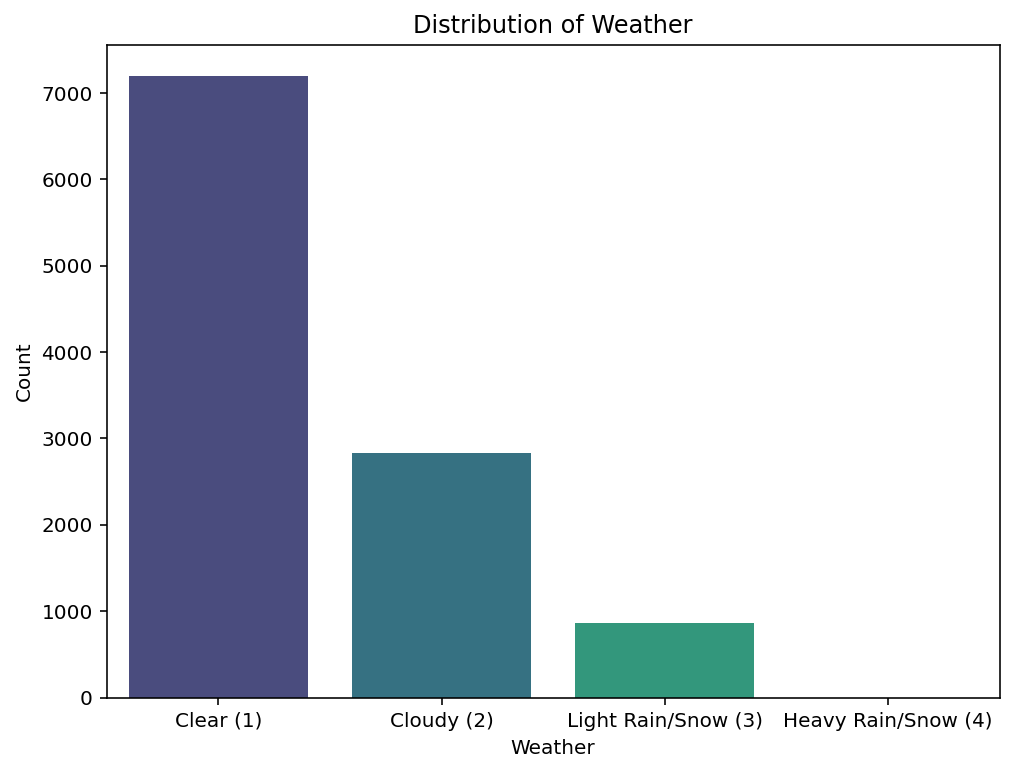

In [15]:
# weather 변수의 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', data=train, palette='viridis')
plt.title('Distribution of Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear (1)', 'Cloudy (2)', 'Light Rain/Snow (3)', 'Heavy Rain/Snow (4)'])
plt.show()

### season, weather 을 one-hot encoding 해서 넣기

In [16]:
# season, weather 을 one-hot encoding 해서 넣기
train = pd.get_dummies(train, columns=['season', 'weather'])
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,minute,second,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,7.608877,3,13,16,...,0,0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,7.599095,8,32,40,...,0,0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,7.539197,5,27,32,...,0,0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,6.184625,3,10,13,...,0,0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,6.266818,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [17]:
# X에는 예측에 사용할 피처들 선택
# casual, registered, count는 제거
X = train[['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 
           'season_1', 'season_2', 'season_3', 'season_4',
           'weather_1', 'weather_2', 'weather_3', 'weather_4']]

# y에는 예측하고자 하는 count 값을 넣기
y = train['count']

In [18]:
# 데이터셋을 학습용(train)과 테스트용(test)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
2815,2011,7,6,5,0,1,27.88,31.820,83,6.0032,0,0,1,0,1,0,0,0
8695,2012,8,4,16,0,0,36.90,40.910,39,19.9995,0,0,1,0,1,0,0,0
8406,2012,7,11,15,0,1,32.80,35.605,41,16.9979,0,0,1,0,1,0,0,0
1543,2011,4,10,4,0,0,14.76,18.180,93,7.0015,0,1,0,0,0,1,0,0
4952,2011,11,19,10,0,0,13.12,15.150,45,16.9979,0,0,0,1,1,0,0,0


In [20]:
# 분리된 데이터 크기 확인
print(f"Train data: {X_train.shape}, Train labels: {y_train.shape}")
print(f"Test data: {X_test.shape}, Test labels: {y_test.shape}")

Train data: (8708, 18), Train labels: (8708,)
Test data: (2178, 18), Test labels: (2178,)


### (5) LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [21]:
# LinearRegression 모델 객체 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 학습된 모델의 coefficients 및 intercept 출력
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [ 80.86663177   9.46769489   0.15365073   7.75146173  -8.73337633
  -0.08543695   5.11858645   2.83056092  -1.90385985   0.59151976
  18.45094704  14.09203693 -36.91321484   4.37023087  -9.5172037
  -3.82180183 -39.58539508  52.92440061]
Model intercept: -162675.29069330203


### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
# 테스트 데이터를 사용하여 예측값 계산
y_pred = model.predict(X_test)

# MSE (Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE (Root Mean Squared Error) 계산
rmse = np.sqrt(mse)

# 예측값 및 손실 함수 출력
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 19793.970121795857
RMSE: 140.69104492396045


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

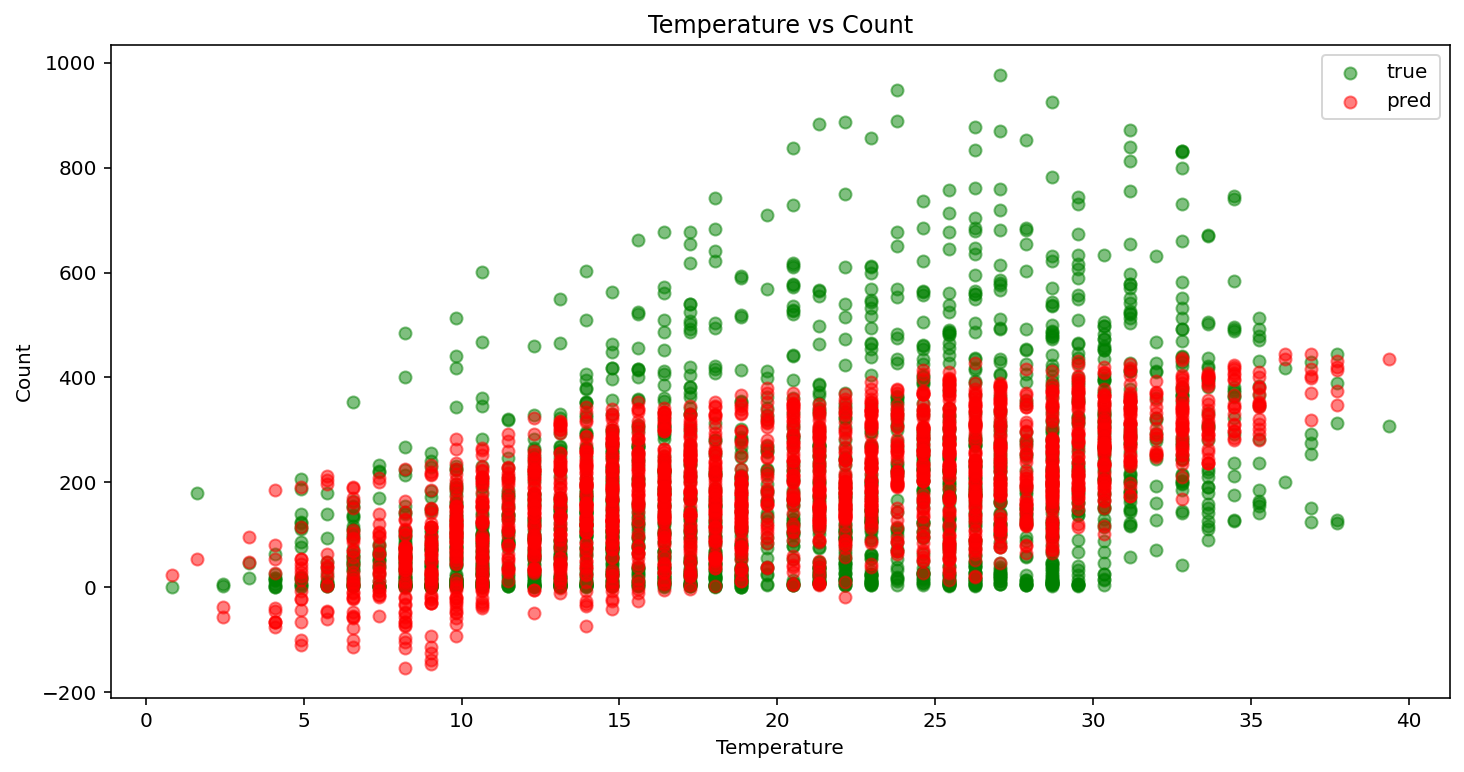

In [24]:
# temp, count 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X_test['temp'], y_test, color='g', label='true', alpha=0.5)
plt.scatter(X_test['temp'], y_pred, color='r', label='pred', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.legend()
plt.show()

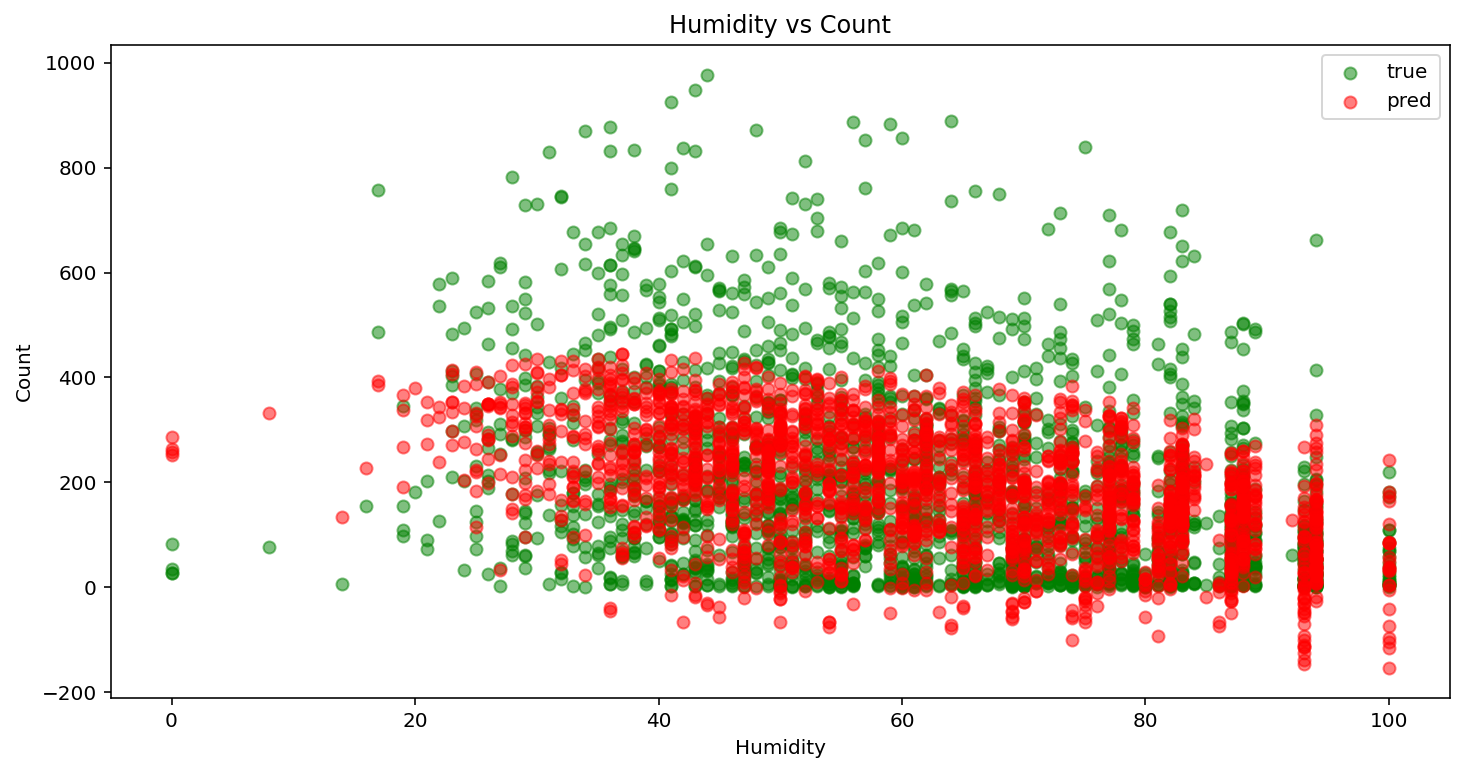

In [25]:
# humidity, count 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X_test['humidity'], y_test, color='g', label='true', alpha=0.5)
plt.scatter(X_test['humidity'], y_pred, color='r', label='pred', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.legend()
plt.show()